# HOUSE PRICE PREDICTION USING ARTIFICIAL NEURAL NETWORK

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option("display.max_columns",2000)
df = pd.read_csv(r"D:\ml\kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Feature Columns
    
* id - Unique ID for each home sold

* date - Date of the home sale

* price - Price of each home sold

* bedrooms - Number of bedrooms

* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

* sqft_living - Square footage of the apartments interior living space

* sqft_lot - Square footage of the land space

* floors - Number of floors

* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

* view - An index from 0 to 4 of how good the view of the property was

* condition - An index from 1 to 5 on the condition of the apartment,

* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

* sqft_above - The square footage of the interior housing space that is above ground level

* sqft_basement - The square footage of the interior housing space that is below ground level

* yr_built - The year the house was initially built

* yr_renovated - The year of the house’s last renovation

* zipcode - What zipcode area the house is in

* lat - Lattitude

* long - Longitude

* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Data Visualization

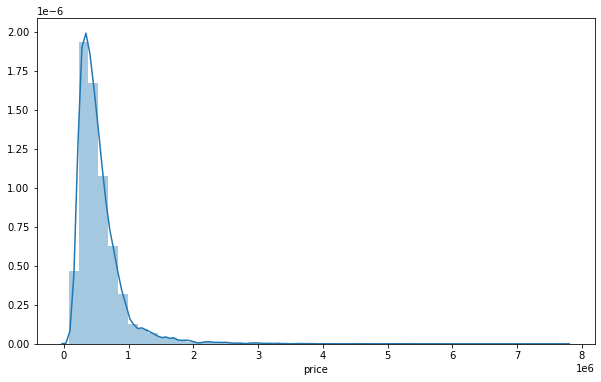

In [6]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

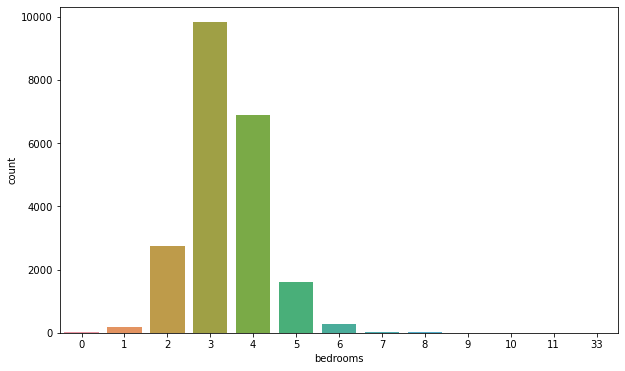

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(df['bedrooms'])

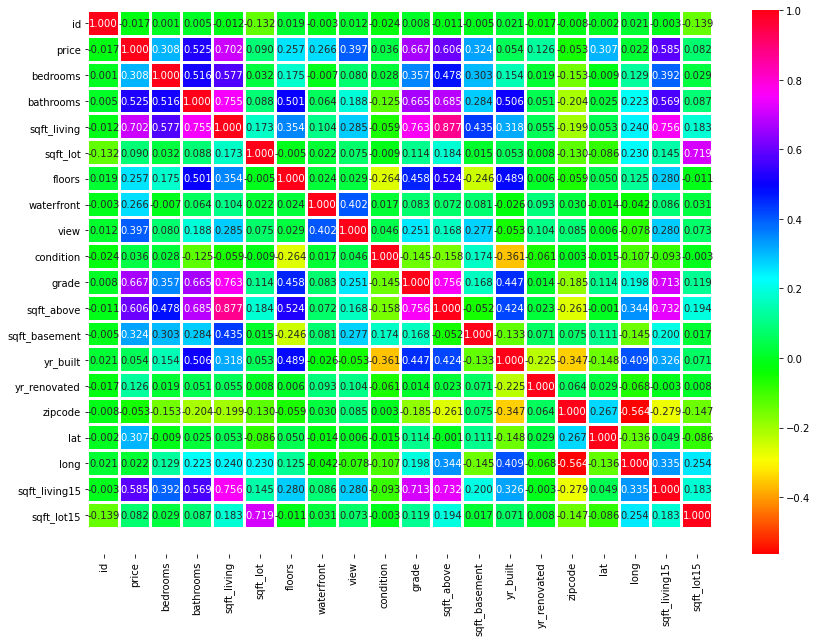

In [8]:
# This will give the correlation between that features

# Example : age in Y-axis and age in X-axis will have the maximum correlation that's why it's dark in color

plt.figure(figsize=(14,10))                                       # Help to set figure size                                     

sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)    
         
# annot : Help to see the value in box
# cmap : The mapping from data values to color space.
# fmt : String formatting code to use when adding annotations.

plt.ylim(21,0)                                                     # show us exact number of values we want
plt.show()

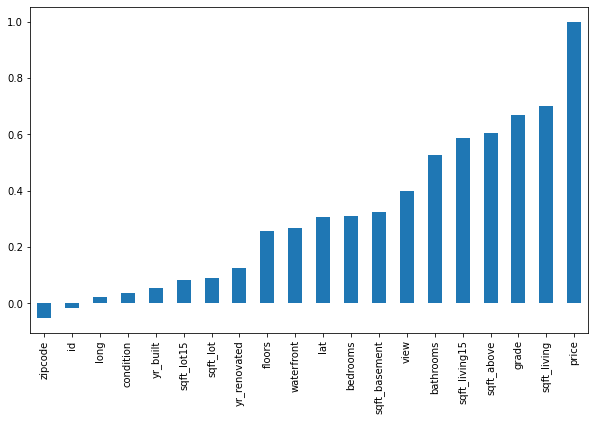

In [9]:
# This will show you the co-orelation between features respect to our target val

# .corr        : Help us to show the correlation between the values
# .sort_values : By default assendig = True
# .plot        : Use to plot
# kind=" "     : ‘bar’ or ‘barh’ for bar plots, ‘hist’ for histogram,‘box’ for boxplot,‘kde’ or ‘density’ for density plots,
#                area’ for area plots,‘scatter’ for scatter plots,‘hexbin’ for hexagonal bin plots,‘pie’ for pie plots

plt.figure(figsize=(10,6))
df.corr()['price'].sort_values().plot(kind='bar')

In [10]:
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

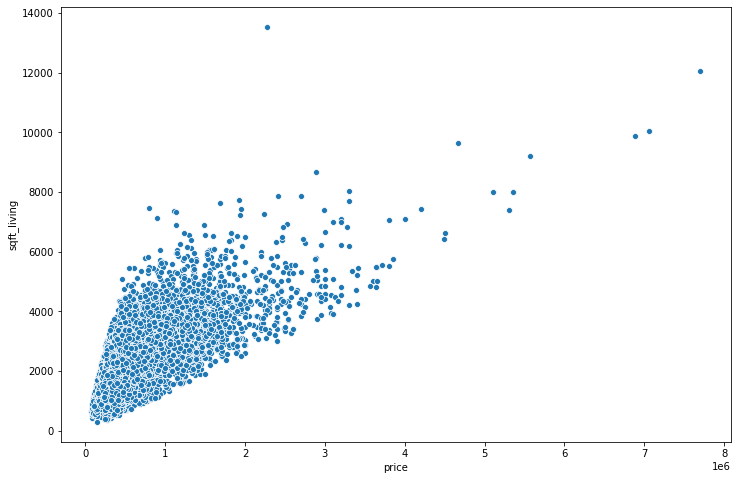

In [11]:
# Exploring highly correlated features with label through scatter plot

plt.figure(figsize=(12,8))
sns.scatterplot(x="price", y="sqft_living", data=df)

### Geographical visualization

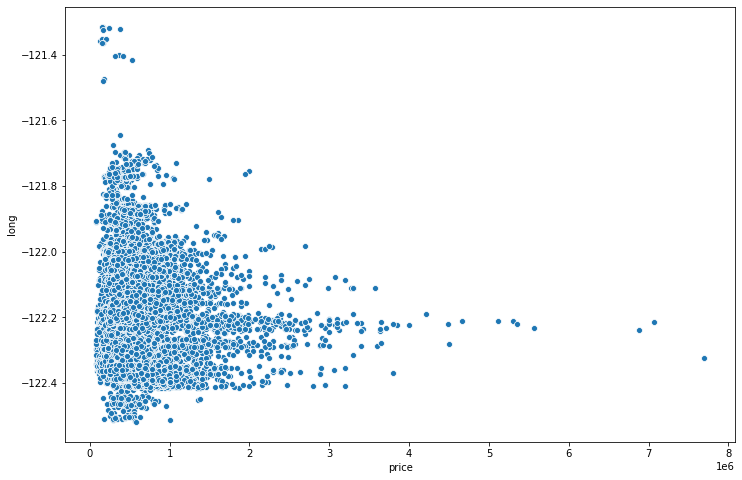

In [12]:
# Now Let's see distribution of the price based on long

plt.figure(figsize=(12,8))
sns.scatterplot(x="price",y="long",data=df)

From the above graph we can see that longitude near "-122.2" has some expensive houses.

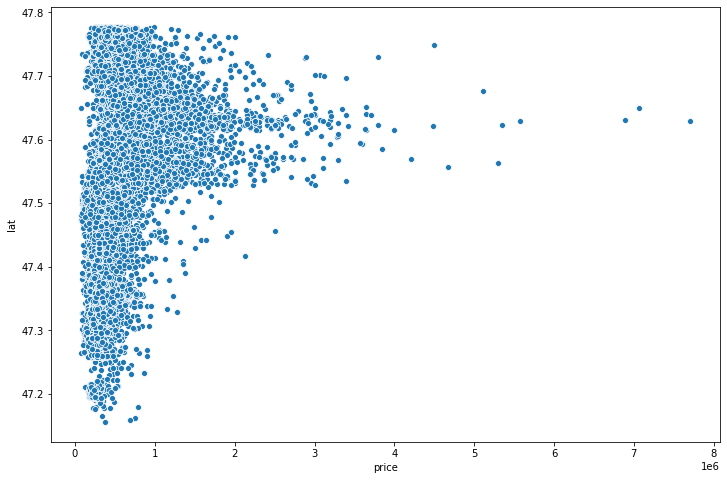

In [13]:
# Now Let's see distribution of the price based on lat

plt.figure(figsize=(12,8))
sns.scatterplot(x="price",y="lat",data=df)

From the above graph we can see that the latitude between "47.6" - "47.7" has some expensive houses.

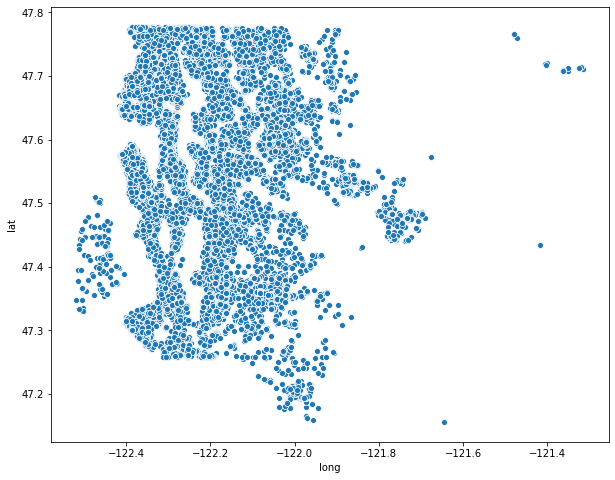

In [14]:
# Ploting the long and lat of the area

plt.figure(figsize=(10,8))
sns.scatterplot(x="long",y="lat",data=df)

##### Original KC Location

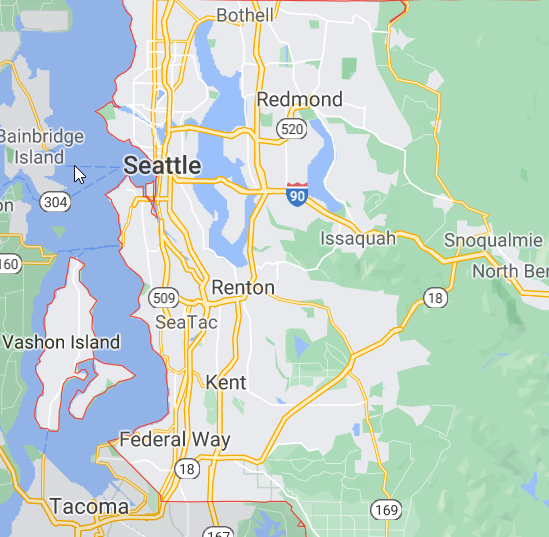

In [15]:
from IPython.display import Image
Image(filename='E:\Capture\kc.png') 

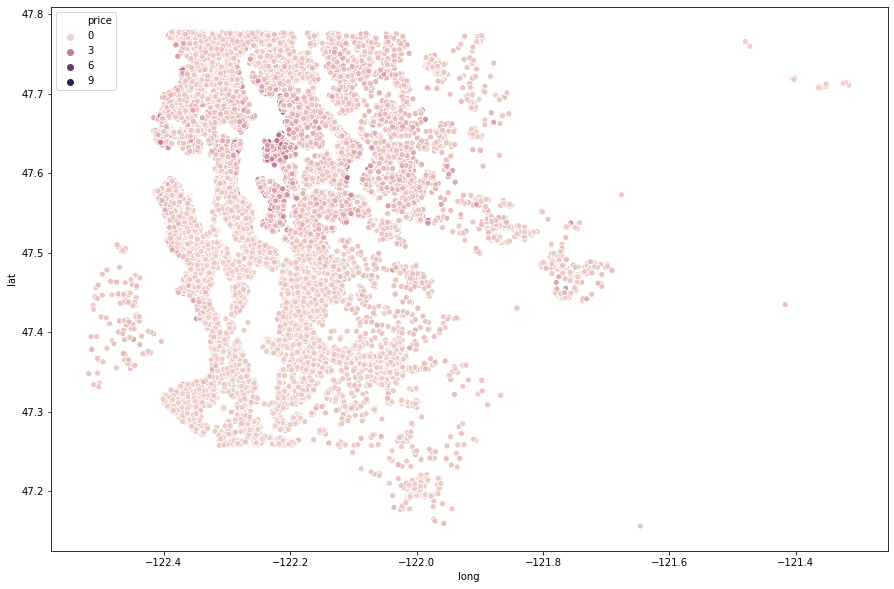

In [16]:
# Now Let's see this with respect to price

# Ploting the long and lat of the area

plt.figure(figsize=(15,10))
sns.scatterplot(x="long",y="lat", hue="price",data=df)

If you have noticed that, the <b>"long" near "-122.2"</b> & <b>"lat" between "47.6"-"47.7"</b> we have the most expensive houses.  

##### --- How ever we are not getting the quite color gradient and that because the really expensive outliers houses. ---

###### Now let's see we can clean up the map by dropping some of the outliers

In [17]:
# Let's see Top most expensive houses

df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [18]:
df.shape

(21613, 21)

In [19]:
# Now what we will do we will drop 0.001 percent houses From 21613 records That is
len(df)*0.005

108.065

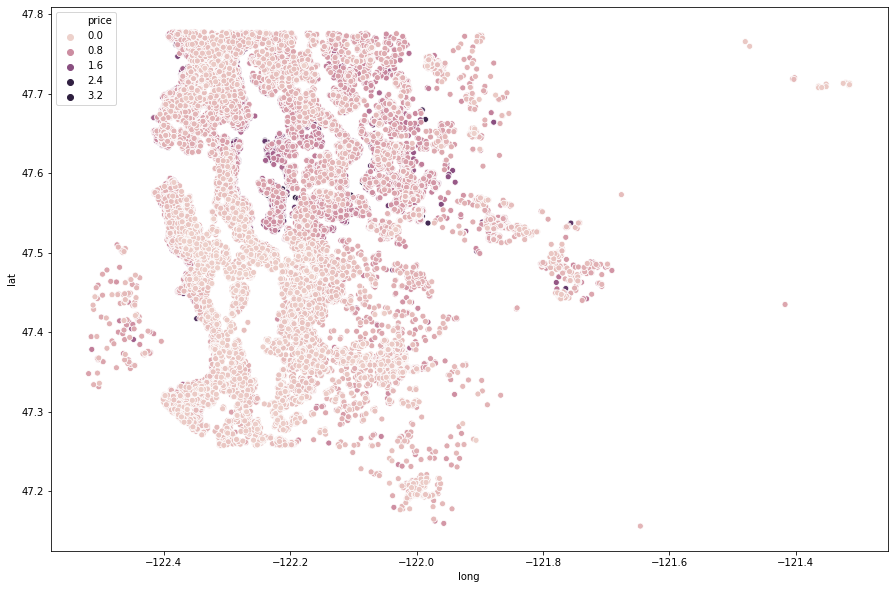

In [20]:
# Data set with 0.001 Dropping houses 

# what i am doing here is, I am dropping Top 108 most expensive house which are baisically considered as outliers
droped_houses = df.sort_values('price',ascending=False).iloc[108:]



# Now Let's see this with respect to dropped houses and price

# Ploting the long and lat of the area

plt.figure(figsize=(15,10))
sns.scatterplot(x="long",y="lat", hue="price",data=droped_houses)

Now we can see lot clear color distribution. Which will help us to predict the house price respectively.

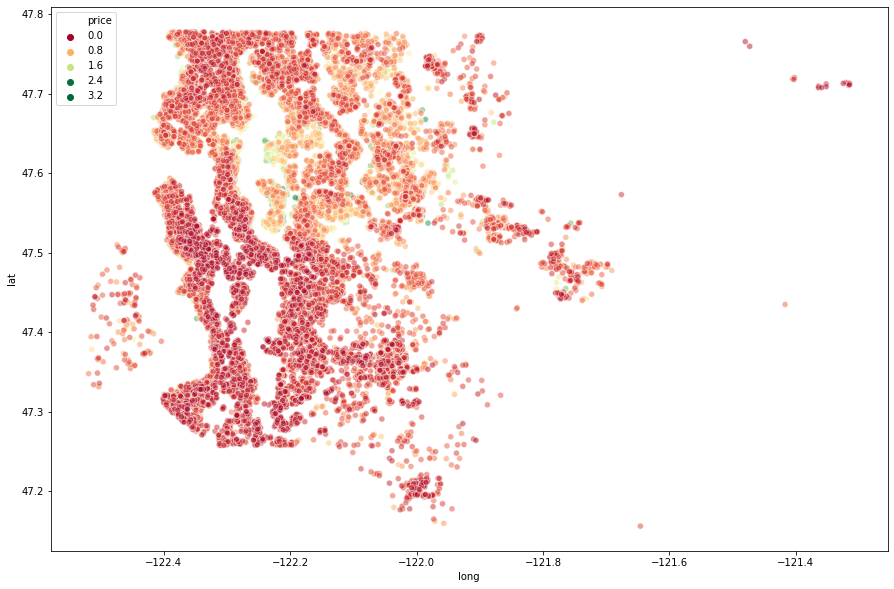

In [21]:
# Now let's see this with some other color gradient

plt.figure(figsize=(15,10))
sns.scatterplot(x="long",y="lat", hue="price", alpha=0.5, palette="RdYlGn", data=droped_houses)

From the plot we can say that the houses near the water area are expensive.

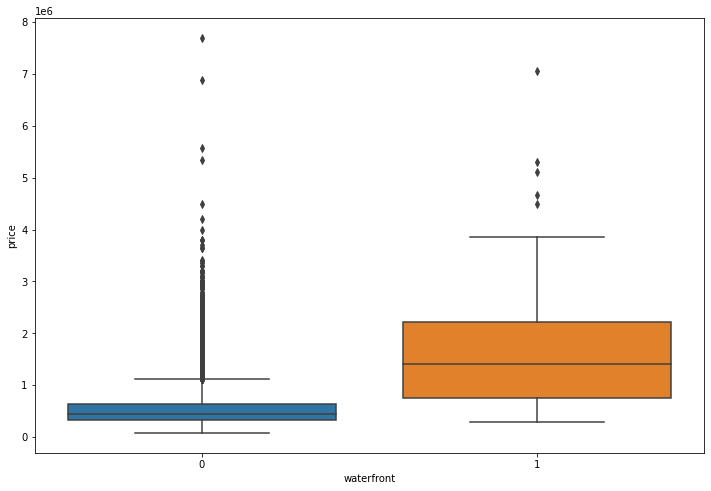

In [22]:
# Let's check really the houses near waterbodies are expensive?

plt.figure(figsize=(12,8))
sns.boxplot(x="waterfront", y="price",data=df)

### Feature engineering

In [23]:
# Handling the date column than we will select Top 10-15 most correlated columns

df['date'] = pd.to_datetime(df['date'])
df.date

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [24]:
# Extracting the month and year components from the date

df['year'] = df.date.apply(lambda date: date.year)
df['month'] = df.date.apply(lambda date: date.month)

In [25]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


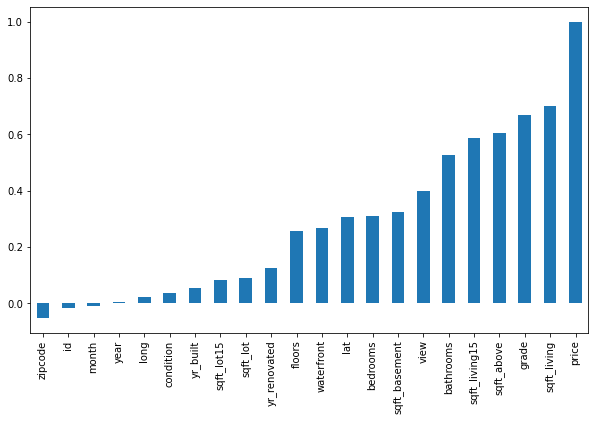

In [26]:
plt.figure(figsize=(10,6))
df.corr()['price'].sort_values().plot(kind='bar')

From the above graph we can see that the month and year have very little correlation with our price. So basically they does not help us to determine the price of the house.

In [27]:
df = df.drop(['id','date'],axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


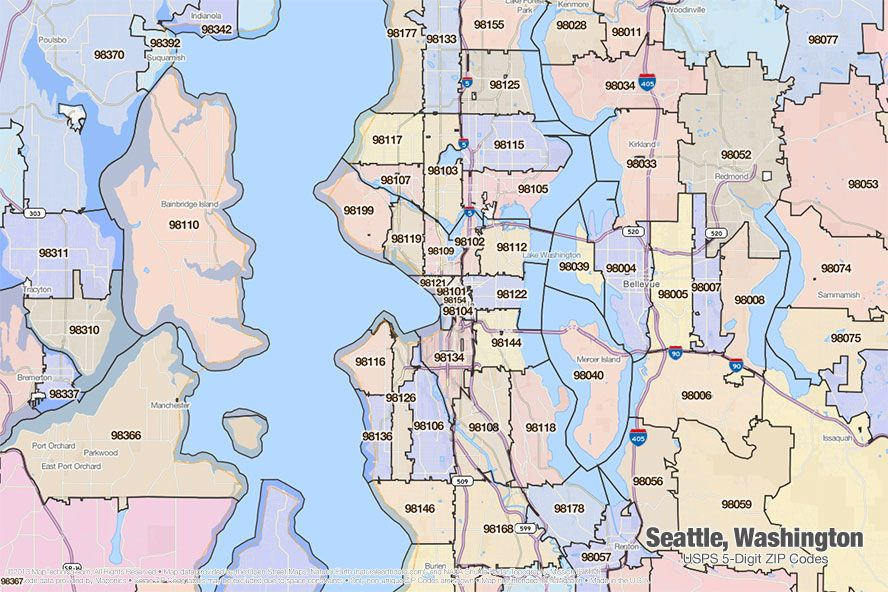

In [28]:
from IPython.display import Image
Image(filename='E:\CAPTURE\zipcode1.jpg') 

Now as we handle the date column now we are going to handle the zipcode column because if we see the zipcode values they are more kind of categorical variables for example: the house which are at zipcode location: 98199 will have the higer price than the house which is located at the zipcode 98059.

In [29]:
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

If you see that there are 70 zipcodes and creating 70 dummies of that much value may lead to bad model. Instead what we can do is we can create classes or categories such as EXPENSIVE & NON-EXPENSIVE LOCATION or EAST, WEST, NORTH, SOUTH but to implement such action we need a domain expert for this. So instead what we will do, we will simply just drop this column because it also have little impact on our target value that is our Price.

In [30]:
df = df.drop('zipcode',axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [31]:
X = df.drop('price',axis=1).values
y = df.price.values

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [33]:
# Now we will standardize our data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating a Model

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(19,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(5,activation="relu"))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [35]:
# validation_data = What that means is, after each epochs of training on a training data we will quickly run the test data &
#                   check our loss on the test data. So that way we can keep a tracking how well our model is performing 
#                   not just on our train data but also on our test data. (This test data will not effect waits or bias of our 
#                   network).

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128, epochs=800)

Epoch 1/800
136/136 [==============================] - 1s 11ms/step - loss: 426739040256.0000 - val_loss: 425182887936.0000
Epoch 2/800
136/136 [==============================] - 0s 2ms/step - loss: 423078854656.0000 - val_loss: 410051510272.0000
Epoch 3/800
136/136 [==============================] - 0s 2ms/step - loss: 350688280576.0000 - val_loss: 235689328640.0000
Epoch 4/800
136/136 [==============================] - 0s 1ms/step - loss: 137740140544.0000 - val_loss: 82827722752.0000
Epoch 5/800
136/136 [==============================] - 0s 2ms/step - loss: 78594670592.0000 - val_loss: 67627364352.0000
Epoch 6/800
136/136 [==============================] - 0s 1ms/step - loss: 67936940032.0000 - val_loss: 60751937536.0000
Epoch 7/800
136/136 [==============================] - 0s 2ms/step - loss: 62022160384.0000 - val_loss: 56337465344.0000
Epoch 8/800
136/136 [==============================] - 0s 2ms/step - loss: 57820110848.0000 - val_loss: 52503396352.0000
Epoch 9/800
136/136 [===

136/136 [==============================] - 0s 1ms/step - loss: 31479756800.0000 - val_loss: 30793322496.0000
Epoch 69/800
136/136 [==============================] - 0s 1ms/step - loss: 31443724288.0000 - val_loss: 30751545344.0000
Epoch 70/800
136/136 [==============================] - 0s 1ms/step - loss: 31387951104.0000 - val_loss: 30685675520.0000
Epoch 71/800
136/136 [==============================] - 0s 1ms/step - loss: 31341989888.0000 - val_loss: 30822449152.0000
Epoch 72/800
136/136 [==============================] - 0s 1ms/step - loss: 31336603648.0000 - val_loss: 30587109376.0000
Epoch 73/800
136/136 [==============================] - 0s 1ms/step - loss: 31181203456.0000 - val_loss: 30675990528.0000
Epoch 74/800
136/136 [==============================] - 0s 1ms/step - loss: 31186987008.0000 - val_loss: 30517880832.0000
Epoch 75/800
136/136 [==============================] - 0s 1ms/step - loss: 31232587776.0000 - val_loss: 30473713664.0000
Epoch 76/800
136/136 [===============

Epoch 135/800
136/136 [==============================] - 0s 1ms/step - loss: 29162377216.0000 - val_loss: 28583413760.0000
Epoch 136/800
136/136 [==============================] - 0s 1ms/step - loss: 29109041152.0000 - val_loss: 28523538432.0000
Epoch 137/800
136/136 [==============================] - 0s 1ms/step - loss: 29061699584.0000 - val_loss: 28453869568.0000
Epoch 138/800
136/136 [==============================] - 0s 1ms/step - loss: 29080946688.0000 - val_loss: 28445392896.0000
Epoch 139/800
136/136 [==============================] - 0s 1ms/step - loss: 29039714304.0000 - val_loss: 28468449280.0000
Epoch 140/800
136/136 [==============================] - 0s 1ms/step - loss: 28983777280.0000 - val_loss: 28375685120.0000
Epoch 141/800
136/136 [==============================] - 0s 1ms/step - loss: 28941842432.0000 - val_loss: 28411680768.0000
Epoch 142/800
136/136 [==============================] - 0s 1ms/step - loss: 28938795008.0000 - val_loss: 28354367488.0000
Epoch 143/800
13

136/136 [==============================] - 0s 1ms/step - loss: 27773112320.0000 - val_loss: 27213551616.0000
Epoch 202/800
136/136 [==============================] - 0s 1ms/step - loss: 27781304320.0000 - val_loss: 27104108544.0000
Epoch 203/800
136/136 [==============================] - 0s 1ms/step - loss: 27729166336.0000 - val_loss: 27134498816.0000
Epoch 204/800
136/136 [==============================] - 0s 1ms/step - loss: 27702976512.0000 - val_loss: 27054721024.0000
Epoch 205/800
136/136 [==============================] - 0s 1ms/step - loss: 27665987584.0000 - val_loss: 27112595456.0000
Epoch 206/800
136/136 [==============================] - 0s 1ms/step - loss: 27634997248.0000 - val_loss: 27036246016.0000
Epoch 207/800
136/136 [==============================] - 0s 1ms/step - loss: 27698081792.0000 - val_loss: 27037761536.0000
Epoch 208/800
136/136 [==============================] - 0s 1ms/step - loss: 27651112960.0000 - val_loss: 27112957952.0000
Epoch 209/800
136/136 [=======

136/136 [==============================] - 0s 1ms/step - loss: 26735828992.0000 - val_loss: 26275665920.0000
Epoch 268/800
136/136 [==============================] - 0s 1ms/step - loss: 26658344960.0000 - val_loss: 26055550976.0000
Epoch 269/800
136/136 [==============================] - 0s 1ms/step - loss: 26627383296.0000 - val_loss: 26076475392.0000
Epoch 270/800
136/136 [==============================] - 0s 1ms/step - loss: 26610909184.0000 - val_loss: 25930778624.0000
Epoch 271/800
136/136 [==============================] - 0s 1ms/step - loss: 26658992128.0000 - val_loss: 25907623936.0000
Epoch 272/800
136/136 [==============================] - 0s 1ms/step - loss: 26529282048.0000 - val_loss: 25893658624.0000
Epoch 273/800
136/136 [==============================] - 0s 1ms/step - loss: 26463043584.0000 - val_loss: 25848389632.0000
Epoch 274/800
136/136 [==============================] - 0s 1ms/step - loss: 26431418368.0000 - val_loss: 25791115264.0000
Epoch 275/800
136/136 [=======

136/136 [==============================] - 0s 1ms/step - loss: 21448884224.0000 - val_loss: 21878863872.0000
Epoch 334/800
136/136 [==============================] - 0s 1ms/step - loss: 21398798336.0000 - val_loss: 21757593600.0000
Epoch 335/800
136/136 [==============================] - 0s 2ms/step - loss: 21373607936.0000 - val_loss: 21693624320.0000
Epoch 336/800
136/136 [==============================] - 0s 2ms/step - loss: 21343506432.0000 - val_loss: 21621882880.0000
Epoch 337/800
136/136 [==============================] - 0s 2ms/step - loss: 21252638720.0000 - val_loss: 21696636928.0000
Epoch 338/800
136/136 [==============================] - 0s 2ms/step - loss: 21328953344.0000 - val_loss: 21619503104.0000
Epoch 339/800
136/136 [==============================] - 0s 1ms/step - loss: 21195061248.0000 - val_loss: 21539479552.0000
Epoch 340/800
136/136 [==============================] - 0s 2ms/step - loss: 21141035008.0000 - val_loss: 21464066048.0000
Epoch 341/800
136/136 [=======

136/136 [==============================] - 0s 1ms/step - loss: 19030171648.0000 - val_loss: 19978217472.0000
Epoch 400/800
136/136 [==============================] - 0s 1ms/step - loss: 18996197376.0000 - val_loss: 19805085696.0000
Epoch 401/800
136/136 [==============================] - 0s 1ms/step - loss: 18908895232.0000 - val_loss: 19985876992.0000
Epoch 402/800
136/136 [==============================] - 0s 1ms/step - loss: 18872883200.0000 - val_loss: 19849093120.0000
Epoch 403/800
136/136 [==============================] - 0s 1ms/step - loss: 18843531264.0000 - val_loss: 19833163776.0000
Epoch 404/800
136/136 [==============================] - 0s 1ms/step - loss: 18822520832.0000 - val_loss: 19970015232.0000
Epoch 405/800
136/136 [==============================] - 0s 1ms/step - loss: 18915729408.0000 - val_loss: 19766124544.0000
Epoch 406/800
136/136 [==============================] - 0s 1ms/step - loss: 18738198528.0000 - val_loss: 19854530560.0000
Epoch 407/800
136/136 [=======

136/136 [==============================] - 0s 2ms/step - loss: 16703079424.0000 - val_loss: 18161920000.0000
Epoch 466/800
136/136 [==============================] - 0s 1ms/step - loss: 16638851072.0000 - val_loss: 18108545024.0000
Epoch 467/800
136/136 [==============================] - 0s 1ms/step - loss: 16644637696.0000 - val_loss: 18189281280.0000
Epoch 468/800
136/136 [==============================] - 0s 1ms/step - loss: 16582252544.0000 - val_loss: 18107115520.0000
Epoch 469/800
136/136 [==============================] - 0s 1ms/step - loss: 16501514240.0000 - val_loss: 18088321024.0000
Epoch 470/800
136/136 [==============================] - 0s 1ms/step - loss: 16492124160.0000 - val_loss: 18078062592.0000
Epoch 471/800
136/136 [==============================] - 0s 1ms/step - loss: 16458759168.0000 - val_loss: 17983604736.0000
Epoch 472/800
136/136 [==============================] - 0s 1ms/step - loss: 16414804992.0000 - val_loss: 18013763584.0000
Epoch 473/800
136/136 [=======

136/136 [==============================] - 0s 1ms/step - loss: 14679880704.0000 - val_loss: 17005627392.0000
Epoch 532/800
136/136 [==============================] - 0s 1ms/step - loss: 14726274048.0000 - val_loss: 16947969024.0000
Epoch 533/800
136/136 [==============================] - 0s 1ms/step - loss: 14689286144.0000 - val_loss: 16936349696.0000
Epoch 534/800
136/136 [==============================] - 0s 1ms/step - loss: 14662320128.0000 - val_loss: 16875973632.0000
Epoch 535/800
136/136 [==============================] - 0s 2ms/step - loss: 14745704448.0000 - val_loss: 16866537472.0000
Epoch 536/800
136/136 [==============================] - 0s 2ms/step - loss: 14626189312.0000 - val_loss: 16876968960.0000
Epoch 537/800
136/136 [==============================] - 0s 2ms/step - loss: 14562167808.0000 - val_loss: 16859664384.0000
Epoch 538/800
136/136 [==============================] - 0s 2ms/step - loss: 14523222016.0000 - val_loss: 16821718016.0000
Epoch 539/800
136/136 [=======

136/136 [==============================] - 0s 1ms/step - loss: 13788965888.0000 - val_loss: 15987652608.0000
Epoch 598/800
136/136 [==============================] - 0s 1ms/step - loss: 13719838720.0000 - val_loss: 16080926720.0000
Epoch 599/800
136/136 [==============================] - 0s 1ms/step - loss: 13660449792.0000 - val_loss: 16194972672.0000
Epoch 600/800
136/136 [==============================] - 0s 1ms/step - loss: 13685446656.0000 - val_loss: 16117971968.0000
Epoch 601/800
136/136 [==============================] - 0s 1ms/step - loss: 13699363840.0000 - val_loss: 16064825344.0000
Epoch 602/800
136/136 [==============================] - 0s 1ms/step - loss: 13630954496.0000 - val_loss: 16198999040.0000
Epoch 603/800
136/136 [==============================] - 0s 2ms/step - loss: 13638493184.0000 - val_loss: 16195198976.0000
Epoch 604/800
136/136 [==============================] - 0s 1ms/step - loss: 13664468992.0000 - val_loss: 16037872640.0000
Epoch 605/800
136/136 [=======

136/136 [==============================] - 0s 1ms/step - loss: 13120352256.0000 - val_loss: 15860837376.0000
Epoch 664/800
136/136 [==============================] - 0s 1ms/step - loss: 13201624064.0000 - val_loss: 15675975680.0000
Epoch 665/800
136/136 [==============================] - 0s 1ms/step - loss: 13129551872.0000 - val_loss: 15651187712.0000
Epoch 666/800
136/136 [==============================] - 0s 1ms/step - loss: 13134655488.0000 - val_loss: 15787307008.0000
Epoch 667/800
136/136 [==============================] - 0s 1ms/step - loss: 13258321920.0000 - val_loss: 15981897728.0000
Epoch 668/800
136/136 [==============================] - 0s 1ms/step - loss: 13083796480.0000 - val_loss: 15739492352.0000
Epoch 669/800
136/136 [==============================] - 0s 1ms/step - loss: 13072079872.0000 - val_loss: 15816530944.0000
Epoch 670/800
136/136 [==============================] - 0s 1ms/step - loss: 13047718912.0000 - val_loss: 15651952640.0000
Epoch 671/800
136/136 [=======

136/136 [==============================] - 0s 1ms/step - loss: 12735415296.0000 - val_loss: 15550216192.0000
Epoch 730/800
136/136 [==============================] - 0s 1ms/step - loss: 12694127616.0000 - val_loss: 15502523392.0000
Epoch 731/800
136/136 [==============================] - 0s 1ms/step - loss: 12792415232.0000 - val_loss: 15581410304.0000
Epoch 732/800
136/136 [==============================] - 0s 1ms/step - loss: 12760842240.0000 - val_loss: 15502376960.0000
Epoch 733/800
136/136 [==============================] - 0s 1ms/step - loss: 12770192384.0000 - val_loss: 15613453312.0000
Epoch 734/800
136/136 [==============================] - 0s 1ms/step - loss: 12711363584.0000 - val_loss: 15502705664.0000
Epoch 735/800
136/136 [==============================] - 0s 1ms/step - loss: 12777186304.0000 - val_loss: 15576692736.0000
Epoch 736/800
136/136 [==============================] - 0s 1ms/step - loss: 12709289984.0000 - val_loss: 15509725184.0000
Epoch 737/800
136/136 [=======

136/136 [==============================] - 0s 2ms/step - loss: 12428475392.0000 - val_loss: 15341873152.0000
Epoch 796/800
136/136 [==============================] - 0s 2ms/step - loss: 12489137152.0000 - val_loss: 15691046912.0000
Epoch 797/800
136/136 [==============================] - 0s 2ms/step - loss: 12419951616.0000 - val_loss: 15322571776.0000
Epoch 798/800
136/136 [==============================] - 0s 2ms/step - loss: 12415584256.0000 - val_loss: 15524093952.0000
Epoch 799/800
136/136 [==============================] - 0s 2ms/step - loss: 12392375296.0000 - val_loss: 15409888256.0000
Epoch 800/800
136/136 [==============================] - 0s 1ms/step - loss: 12402603008.0000 - val_loss: 15346439168.0000


In [36]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,4.267390e+11,4.251829e+11
1,4.230789e+11,4.100515e+11
2,3.506883e+11,2.356893e+11
3,1.377401e+11,8.282772e+10
4,7.859467e+10,6.762736e+10
...,...,...
795,1.248914e+10,1.569105e+10
796,1.241995e+10,1.532257e+10
797,1.241558e+10,1.552409e+10
798,1.239238e+10,1.540989e+10


This is the history of our losses. Because we pass the validation data tuple. So we convert this into a DataFrame. On the table above we not only get the loss on our training set i.e (loss) but we also got loss on your test set i.e (val_loss) now we can directly compare the loss of training vs the loss on test for validation. In order too see if we are overfitting to the training data.

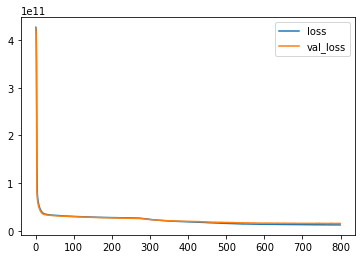

In [37]:
losses = pd.DataFrame(model.history.history)
losses.plot()

This is the exact thing we want i.e there is a decreses in both training loss (blue line) and the validation loss (orange line). Now what does this means? it means we could have continue the training process.

REMEMBER WHEN THE ORANGE LINE STARTED TO SPIKE UPWARDS THAN OUR MODEL IS OVERFITTING THE TRAINING DATA BECAUSE WE HAVE A MUCH LARGER LOSS IN OUR VALIDATION DATA.

#### But what if you want to know and stop when the model started to overfit?

Here we use early stopping and create same model again but with early stopping.

In [38]:
# # Stop automatically stop training data based of a loss condition on the validation data passed during the model.fit()

# from tensorflow.keras.callbacks import EarlyStopping

# early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=85) # verbose = 1 : we will see bunch of output

# model.fit(x = X_train, y = y_train, 
#           validation_data=(X_test,y_test),callbacks=[early_stop], epochs=1000)

In [39]:
print("Model Output:",model.evaluate(X_test,y_test,verbose=0))    # verbose = 0 : we will not see bunch of output

Model Output: 15346438144.0


In [40]:
pred = model.predict(X_test)

print("For model:",pred)

For model: [[301874.34]
 [462440.2 ]
 [672234.7 ]
 ...
 [183770.58]
 [331504.2 ]
 [171448.78]]


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

print("MSE & RMSE for Model")
print("Model MSE:",mean_squared_error(y_test,pred))
print("Model RMSE:",np.sqrt(mean_squared_error(y_test,pred)))

MSE & RMSE for Model
Model MSE: 15346438392.246466
Model RMSE: 123880.74262066104


In [42]:
print("MAE for Model")
print("Model MAE:",mean_absolute_error(y_test,pred))

MAE for Model
Model MAE: 74131.26961167014


In [43]:
print("Model EVS:",explained_variance_score(y_test,pred))

Model EVS: 0.8877526325026492


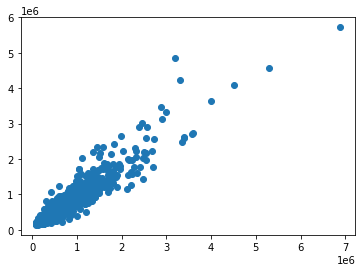

In [44]:
# For Model
plt.scatter(y_test,pred)

In [45]:
from sklearn.metrics import r2_score

score = r2_score(y_test,pred)
print("Model Score:",score)

Model Score: 0.8875154026090806


# So from this we can conclude that our model is 88% accurate